In [40]:
!pip install matplotlib

You should consider upgrading via the '/Users/fatihozkan/Desktop/pythonDataAnalysisProject/venv/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from datasets import load_dataset


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

Plotting Job Postings Dates

In [43]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

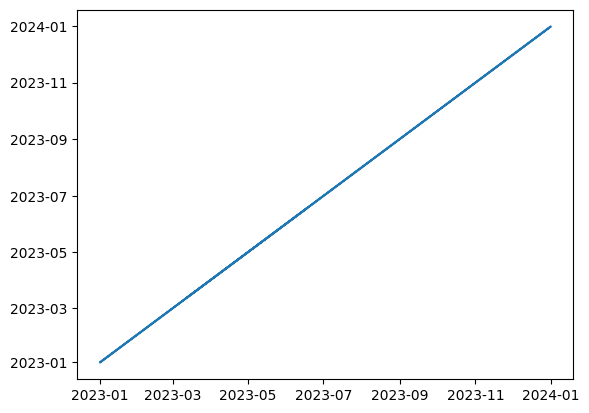

In [44]:
plt.plot(df.job_posted_date, df.job_posted_date)
plt.show()

In [45]:
date_counts = df.job_posted_date.value_counts()
date_counts = date_counts.sort_index()

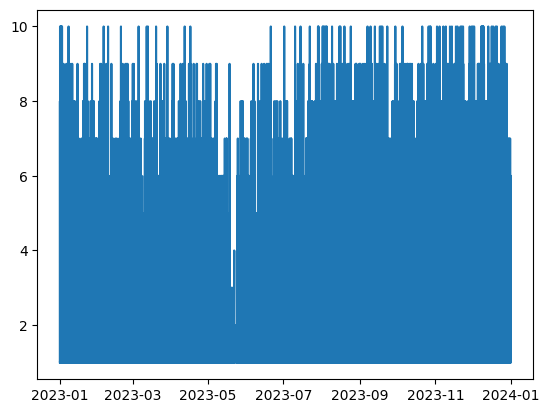

In [46]:
plt.plot(date_counts.index, date_counts)
plt.show()

In [47]:
df["job_posted_month"] = df["job_posted_date"].dt.month
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8


In [48]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

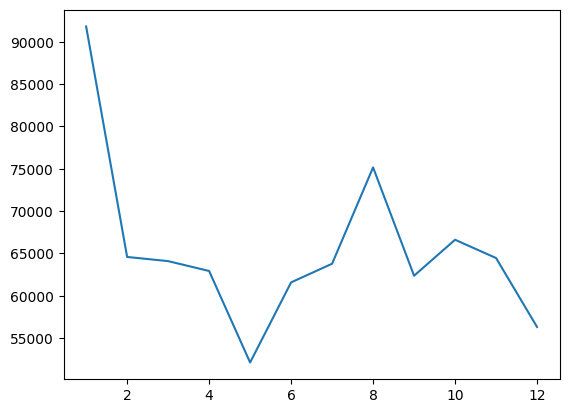

In [49]:
plt.plot(monthly_counts.index, monthly_counts.values)
plt.show()

In [50]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

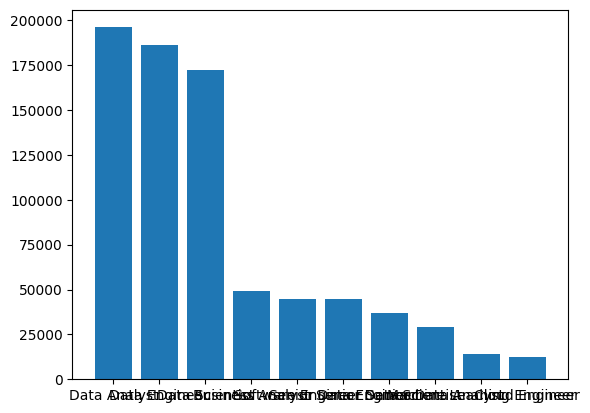

In [51]:
plt.bar(job_counts.index,job_counts.values)

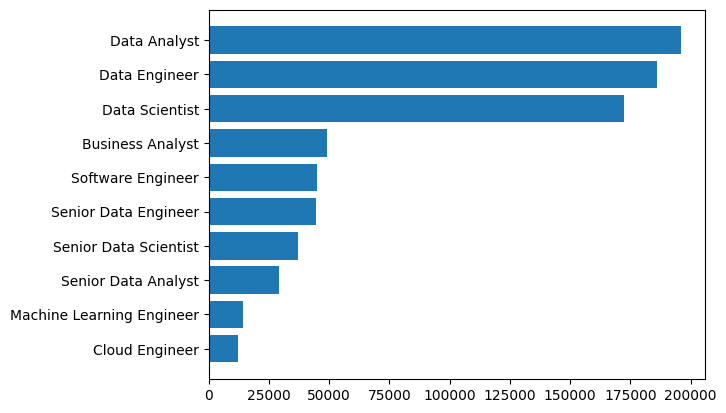

In [52]:
job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index,job_counts.values)
plt.show()

In [53]:
job_counts = df.job_title_short.value_counts()
job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

/var/folders/39/15zp5wjs7wq3fwkgthfgz4bc0000gn/T/ipykernel_99365/2349141181.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


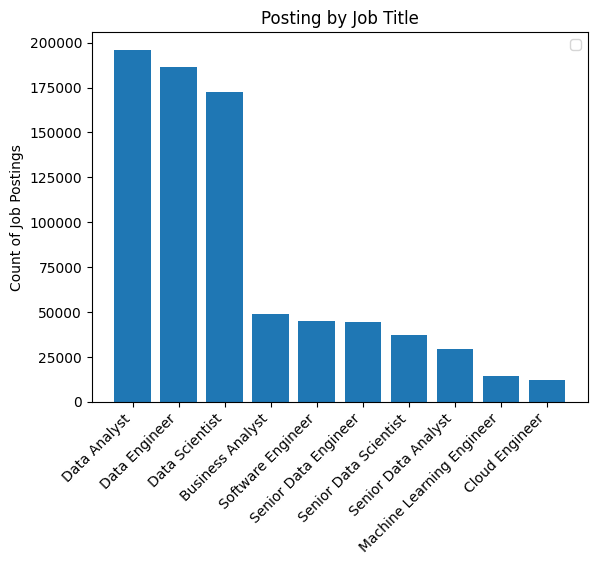

In [54]:
plt.bar(job_counts.index,job_counts)
plt.title("Posting by Job Title")
plt.ylabel("Count of Job Postings")
plt.xticks(rotation = 45,ha = "right" )
plt.legend()
plt.show()

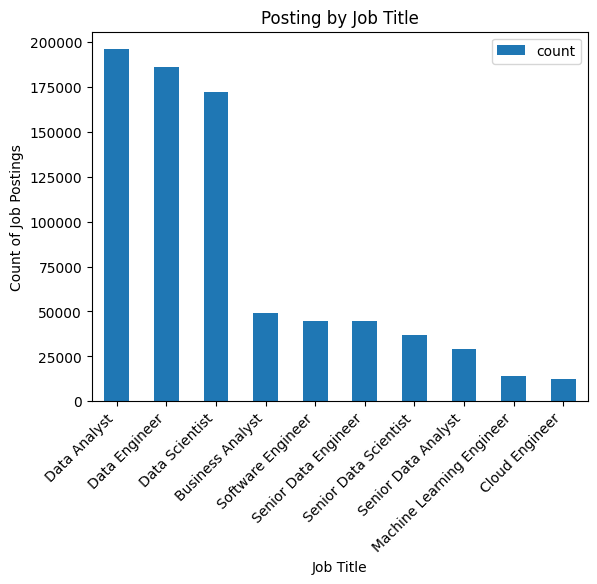

In [55]:
job_counts.plot(kind="bar")
plt.title("Posting by Job Title")
plt.ylabel("Count of Job Postings")
plt.xlabel("Job Title")
plt.xticks(rotation = 45,ha = "right" )
plt.legend()
plt.show()

Median Salary by Job Title

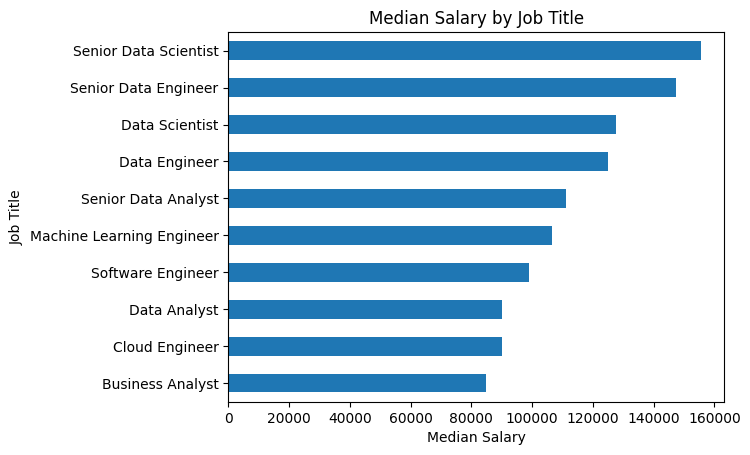

In [14]:
job_medians = df.groupby(["job_title_short"])["salary_year_avg"].median().sort_values()
job_medians.plot(kind="barh")
plt.title("Median Salary by Job Title")
plt.xlabel("Median Salary")
plt.show()